In [1]:
import numpy as np #array and matrices
import pandas as pd #data analysis and manipulation

import matplotlib.pyplot as plt #plots
from matplotlib.pyplot import figure #figure size
import matplotlib.ticker as ticker

import bokeh #interactive visualization

import seaborn as sns
from scipy.stats import norm

from datetime import timedelta, datetime

#import math
#%matplotlib inline
from janitor import clean_names, remove_empty

from sklearn.preprocessing import LabelEncoder

#import plotly.graph_objects as go #financial charts

#plt.style.use("seaborn")
#plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
#COGS: Cost of Goods Sold

In [2]:
#DATA 
df = pd.read_excel(r'C:\Users\rodgo\Desktop\PROYECTOS PORTAFOLIO\Financial Data Power BI\1_data\Financial Sample.xlsx').pipe(clean_names).pipe(remove_empty)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.head(10)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618,3,20,32370,0,32370,16185,16185,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321,3,20,26420,0,26420,13210,13210,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178,3,15,32670,0,32670,21780,10890,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888,3,15,13320,0,13320,8880,4440,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470,3,15,37050,0,37050,24700,12350,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513,3,350,529550,0,529550,393380,136170,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921,5,15,13815,0,13815,9210,4605,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518,5,12,30216,0,30216,7554,22662,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899,5,20,37980,0,37980,18990,18990,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545,5,12,18540,0,18540,4635,13905,2014-06-01,6,June,2014


In [26]:
#DATA TYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    int64         
 6   sale_price           700 non-null    int64         
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

In [57]:
#MATRIX DIM
df.shape

(700, 16)

In [3]:
#DATE FORMAT
#Sort df by year_month
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['date'] = df['date'].dt.date
df = df.sort_values('date')
#df.set_index("date", inplace=True)

#DATA TRANSFORMATION AND DATA TYPE FORMAT
#Float as integers
for i in df.columns:
    if df[i].dtype == "float64":
        df[i] = df[i].astype('int64')
    else:
        pass  
df.head(5)


,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
202,Government,Canada,Velo,Low,2646,120,20,52920,2116,50803,26460,24343,2013-09-01,9,September,2013
626,Enterprise,France,Carretera,High,1023,3,125,127875,17902,109972,122760,-12787,2013-09-01,9,September,2013
336,Midmarket,United States of America,Paseo,Medium,2931,10,15,43965,3077,40887,29310,11577,2013-09-01,9,September,2013
179,Government,United States of America,Velo,Low,736,120,20,14720,588,14131,7360,6771,2013-09-01,9,September,2013
523,Midmarket,Mexico,Velo,High,655,120,15,9825,1080,8744,6550,2194,2013-09-01,9,September,2013


In [4]:
#DF STATS
df.describe()

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
count,700,700,700,700,700,700,700,700,700,700
mean,1608,96,118,182759,13150,169609,145475,24134,8,2014
std,867,109,137,254262,22963,236726,203866,42761,3,0
min,200,3,7,1799,0,1655,918,-40617,1,2013
25%,905,5,12,17392,800,15928,7490,2806,6,2014
50%,1542,10,20,37980,2585,35540,22506,9242,9,2014
75%,2229,250,300,279025,15956,261078,245608,22662,10,2014
max,4492,260,350,1207500,149677,1159200,950625,262200,12,2014


In [135]:
df.isnull().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
month_number           0
month_name             0
year                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 202 to 451
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    int64         
 5   manufacturing_price  700 non-null    int64         
 6   sale_price           700 non-null    int64         
 7   gross_sales          700 non-null    int64         
 8   discounts            700 non-null    int64         
 9   sales                700 non-null    int64         
 10  cogs                 700 non-null    int64         
 11  profit               700 non-null    int64         
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null

In [4]:
# UNPACKING CATEGORICAL VARIABLES

#SI LA CANTIDAD DE VALORES ÚNICOS DE LOS VECTORES >5 ASUMIREMOS Q NO ES CATEGÓRICA:

for i in df.columns:
    values, counts = np.unique(df[i], return_counts=True)
    if len(values) <= 15:
        print(f"{i}:{values}\nFrequency of {i}:{counts}\n") 
    else:
        pass
        #print(f"No labels variable: {i}")


segment:['Channel Partners' 'Enterprise' 'Government' 'Midmarket' 'Small Business']
Frequency of segment:[100 100 300 100 100]

country:['Canada' 'France' 'Germany' 'Mexico' 'United States of America']
Frequency of country:[140 140 140 140 140]

product:['Amarilla' 'Carretera' 'Montana' 'Paseo' 'VTT' 'Velo']
Frequency of product:[ 94  93  93 202 109 109]

discount_band:['High' 'Low' 'Medium' 'None']
Frequency of discount_band:[245 160 242  53]

manufacturing_price:[  3   5  10 120 250 260]
Frequency of manufacturing_price:[ 93  93 202 109 109  94]

sale_price:[  7  12  15  20 125 300 350]
Frequency of sale_price:[100 100 100 100 100 100 100]

month_number:[ 1  2  3  4  5  6  7  8  9 10 11 12]
Frequency of month_number:[ 35  35  35  35  35  70  35  35  70 140  70 105]

month_name:['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
Frequency of month_name:[ 35  35 105  35  35  35  70  35  35  70 140  70]

year:[2013 2014]
Frequ

CATEGORICAL AND NUMERICAL

Categorical Values: Segment, Country, Product, Discount Band, Manufacturing Price, Sale Price, Date, Month Number, Month Name, Year

Numerical Values: Units Sold, Gross Sales, Sales, COGS, Profit, Date* (values = 16) 

### 1. LINE CHART

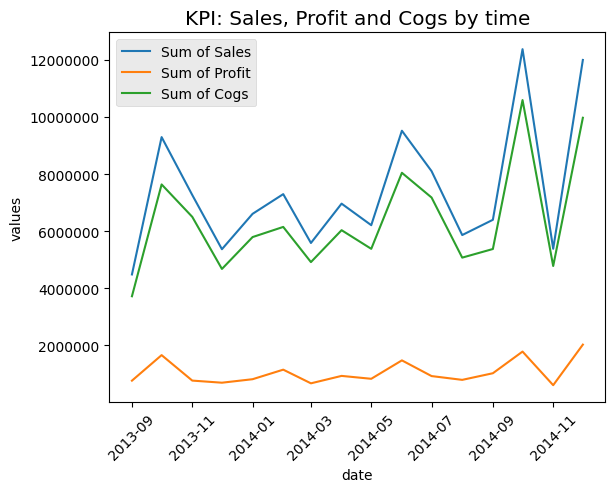

In [8]:
#Time series relation between sales, cogs and profit
#plt.plot(time_series1, values1, label='Time Series 1')

sum_sales = df.groupby('date')['sales'].sum()
sum_profit = df.groupby('date')['profit'].sum()
sum_cogs = df.groupby('date')['cogs'].sum()

plt.plot(df['date'].unique(), sum_sales, label='Sum of Sales')
plt.plot(df['date'].unique(), sum_profit, label= 'Sum of Profit')
plt.plot(df['date'].unique(), sum_cogs, label= 'Sum of Cogs')
plt.style.use('ggplot')
plt.title('KPI: Sales, Profit and Cogs by time')
plt.ylabel('values')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [30]:
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
202,Government,Canada,Velo,Low,2646,120,20,52920,2116,50803,26460,24343,2013-09-01,9,September,2013
626,Enterprise,France,Carretera,High,1023,3,125,127875,17902,109972,122760,-12787,2013-09-01,9,September,2013
336,Midmarket,United States of America,Paseo,Medium,2931,10,15,43965,3077,40887,29310,11577,2013-09-01,9,September,2013
179,Government,United States of America,Velo,Low,736,120,20,14720,588,14131,7360,6771,2013-09-01,9,September,2013
523,Midmarket,Mexico,Velo,High,655,120,15,9825,1080,8744,6550,2194,2013-09-01,9,September,2013


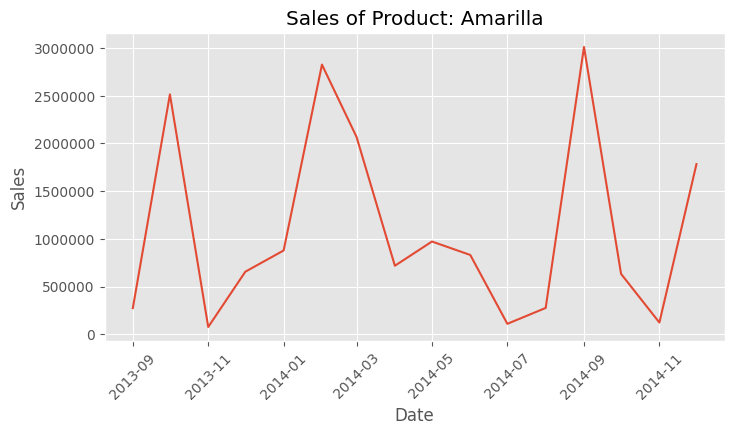

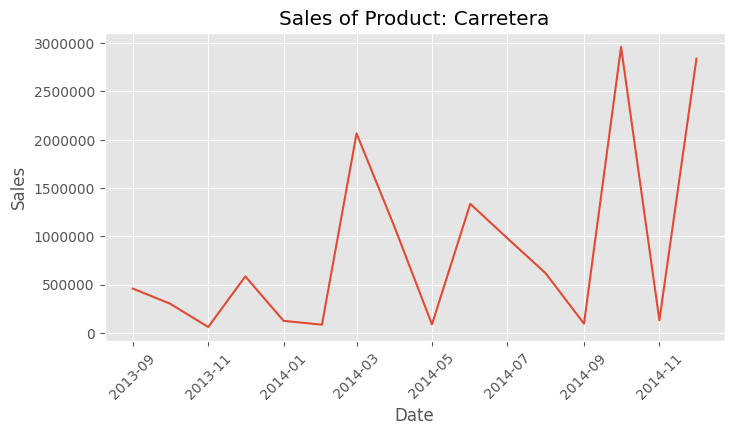

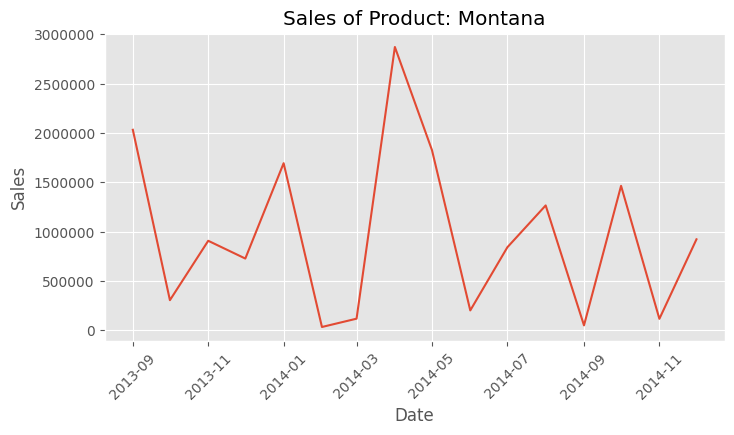

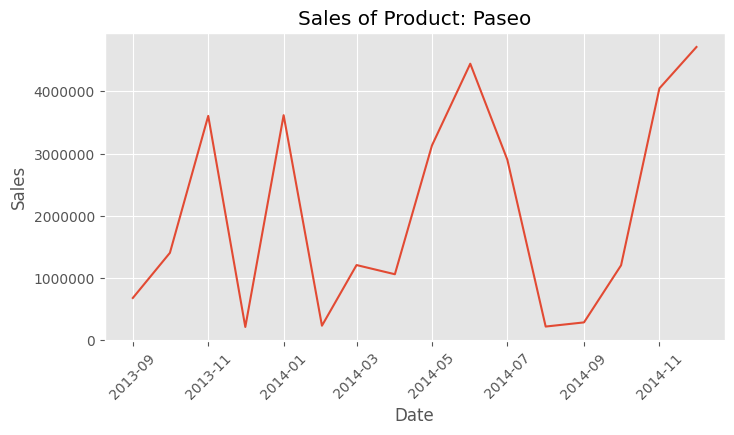

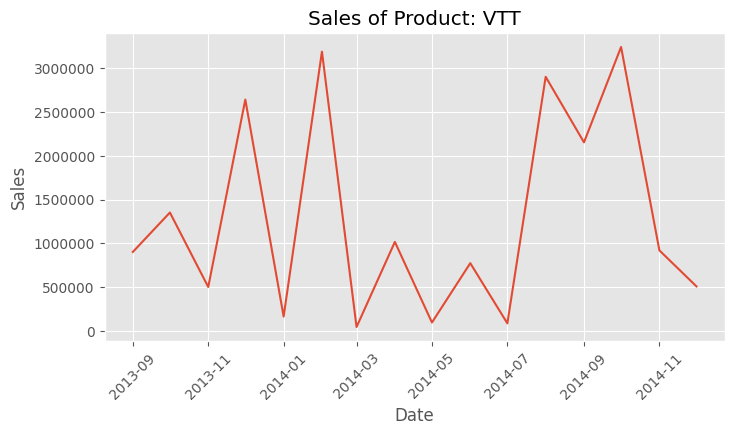

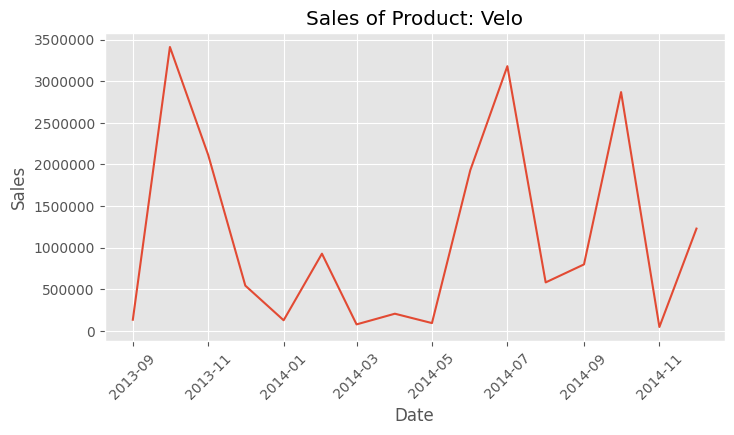

In [44]:
#Sales disaggregate by product over time

df_grouped = df.groupby(['product', 'date']).sum().reset_index()
products = df_grouped['product'].unique()
for i in products:
    fig, ax = plt.subplots(figsize=(8, 4))
    data_product = df_grouped[df_grouped['product'] == i]
    plt.plot(data_product['date'], data_product['sales'])
    plt.title(f'Sales of Product: {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Sales')
    plt.ticklabel_format(style='plain', axis='y')
    #plt.legend()
    plt.show()

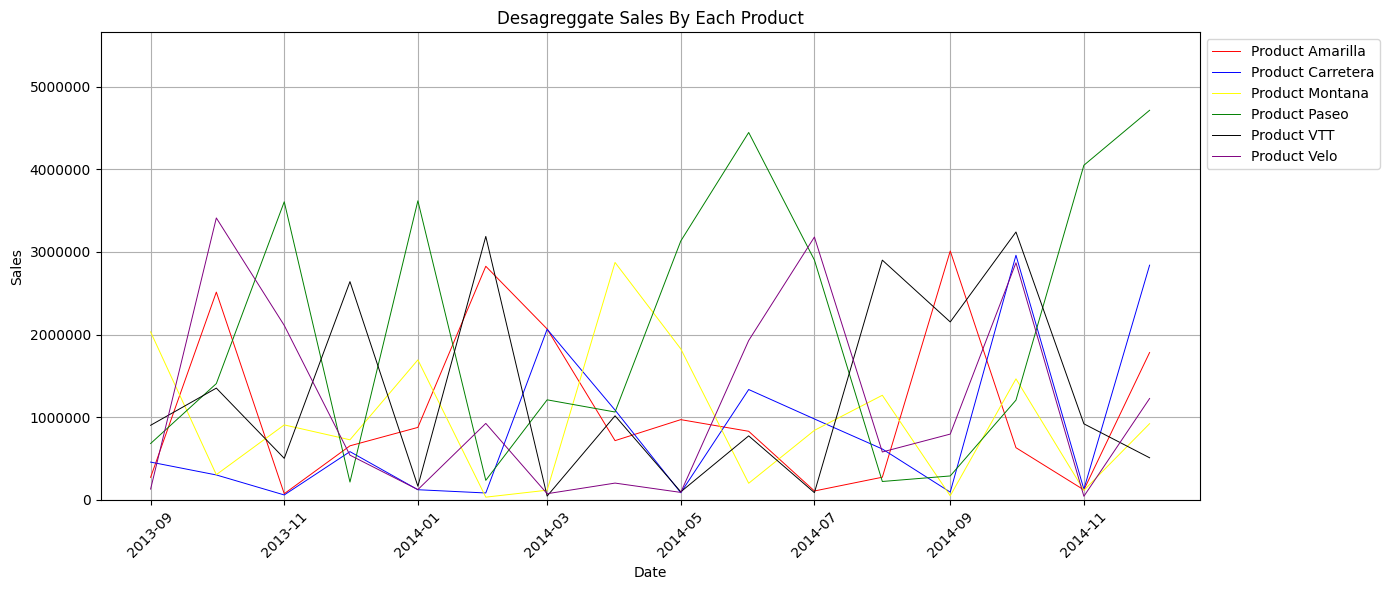

In [11]:
#TERMINAR AQUI GRAFICO AGREGADO DE PRODUCTOS A TRAVES DEL TIEMPO Y AJUSTAR VISUALIZACIÓN 

df_grouped = df.groupby(['product', 'date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
products = df_grouped['product'].unique()
colors = ['red', 'blue', 'yellow', 'green', 'black', 'purple']  # Colors for each product
for i, j in enumerate(products):
    data_product = df_grouped[df_grouped['product'] == j]
    plt.plot(data_product['date'], data_product['sales'], label=f'Product {j}', color=colors[i % len(colors)], linestyle='solid', linewidth=0.7)

plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)    
plt.title('Desagreggate Sales By Each Product')
plt.xlabel('Date')
plt.xticks(rotation=45)

#plt.yticks(np.arange(0, df_grouped['sales'].max()+1, (df_grouped['sales'].max()+1)//10))
plt.ylim(0, df_grouped['sales'].max() * 1.2)

plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### 2. BAR CHART

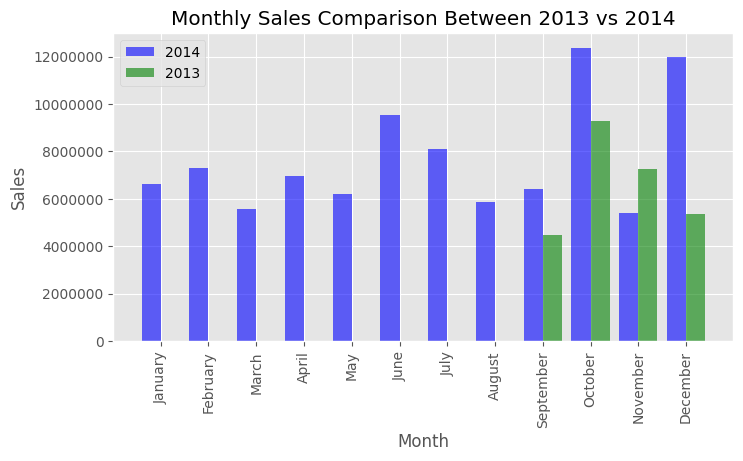

In [54]:
# Filter the dataframe for data from 2013 and 2014
df_2013 = df[df['year'] == 2013].copy()
df_2014 = df[df['year'] == 2014].copy()

# Define the desired ordering of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Convert the month_name column to categorical with the specified ordering
df_2013['month_name'] = pd.Categorical(df_2013['month_name'], categories=month_order, ordered=True)
df_2014['month_name'] = pd.Categorical(df_2014['month_name'], categories=month_order, ordered=True)

# Group the data by month_name and calculate the total sales for each month for 2013 and 2014
monthly_sales_2013 = df_2013.groupby('month_name')['sales'].sum()
monthly_sales_2014 = df_2014.groupby('month_name')['sales'].sum()

# Set the positions for the bars
bar_width = 0.4
index = np.arange(len(month_order))

fig, ax = plt.subplots(figsize=(8, 4))
# Create a grouped bar plot using the monthly_sales data for both years
plt.bar(index, monthly_sales_2014, bar_width, label='2014', alpha=0.6, color='blue')
plt.bar(index + bar_width, monthly_sales_2013, bar_width, label='2013', alpha=0.6, color='green')

# Set the x-axis ticks and labels
plt.xticks(index + bar_width/2, month_order, rotation=90)

# Set the labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Sales Comparison Between 2013 vs 2014')

# Add a legend to differentiate between the years
plt.legend()

# Display the plot
plt.show()

### 3. PIE CHARTS

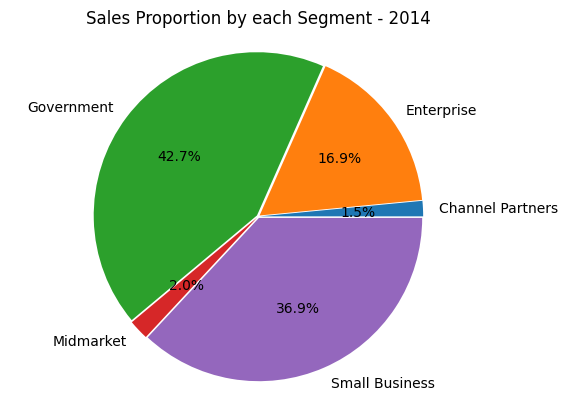

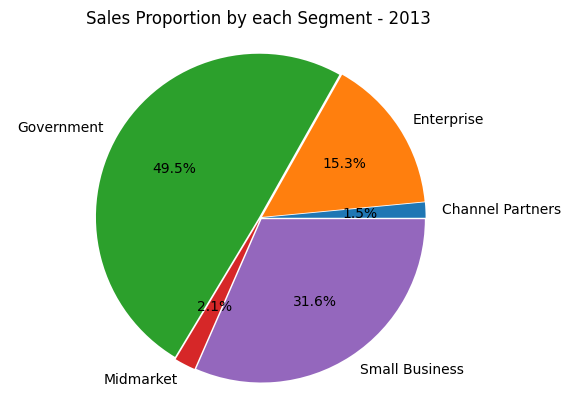

In [5]:
# Calculate total sales for each year and segment
yearly_segment_sales = df.groupby(['year', 'segment'])['sales'].sum()

# Get the unique years in the dataset
unique_years = df['year'].unique()

# Generate a pie chart for each year
for year in unique_years:
    # Filter the data for the current year
    year_data = yearly_segment_sales.loc[year]
    
    # Calculate the explode values
    num_segments = len(year_data.index)
    explode = [0.01] * num_segments
    
    # Plotting the pie chart for the current year
    patches, texts, autotexts = plt.pie(year_data, labels=year_data.index, autopct='%1.1f%%', explode=explode)
    plt.title(f'Sales Proportion by each Segment - {year}')
    plt.axis('equal')
    plt.show()


In [6]:
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618,3,20,32370,0,32370,16185,16185,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321,3,20,26420,0,26420,13210,13210,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178,3,15,32670,0,32670,21780,10890,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888,3,15,13320,0,13320,8880,4440,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470,3,15,37050,0,37050,24700,12350,2014-06-01,6,June,2014


### 4. SCATTER PLOT

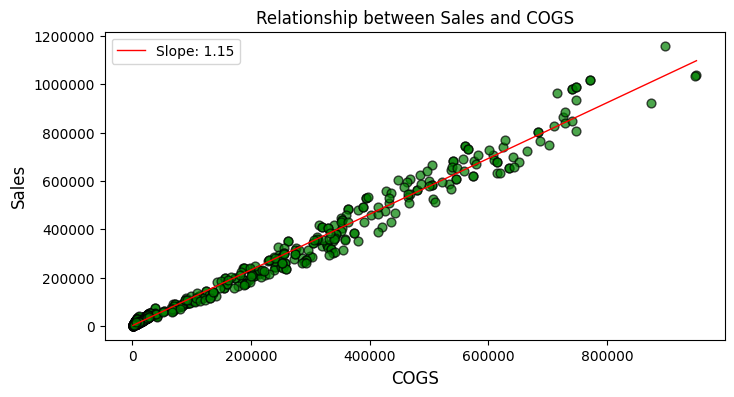

In [67]:
#Relationship between Sales and COGS (Cost of Goods Sold)
fig = plt.figure(figsize=(8, 4))
plt.scatter(df['cogs'], df['sales'], alpha=0.7, s=40, c='green', edgecolors='black')

# Linear regression line
slope, intercept = np.polyfit(df['cogs'], df['sales'], 1)
x = np.array([df['cogs'].min(), df['cogs'].max()])
y = slope * x + intercept
plt.plot(x, y, color='red', linewidth=1)

# Axis labels and title
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('COGS', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Relationship between Sales and COGS')

# Add the slope value as a legend
slope_label = 'Slope: {:.2f}'.format(slope)
plt.legend([slope_label])

# Show the plot
plt.show()

In [ ]:
#Considerando los alcances, limitaciones y supuestos de una regresión lineal B=1.15 indicaría que por cada unidad de incremento en costos, se espera que las ventas aumenten en 1.15. 
#Notar que una pendiente > 1 sugiere una relacion relativamente positiva, indicando que un aumento en COGS tiene un impacto positivo en el incremento de las ventas.

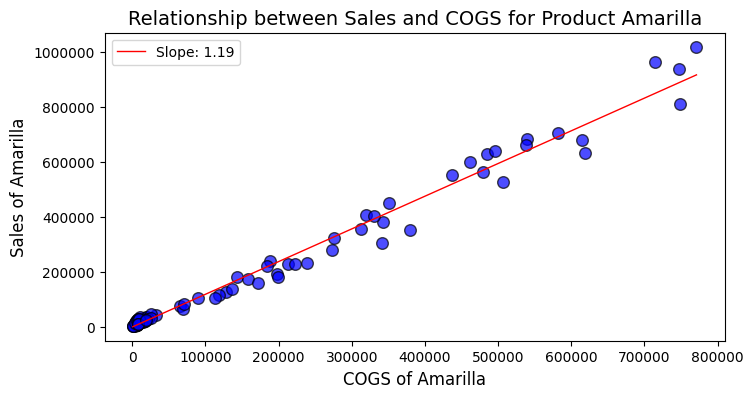

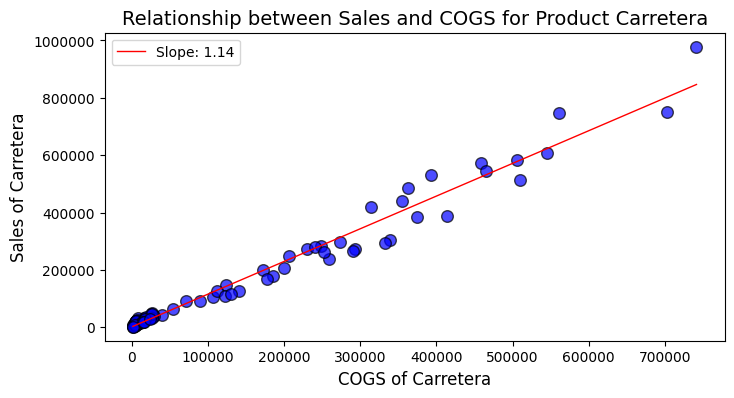

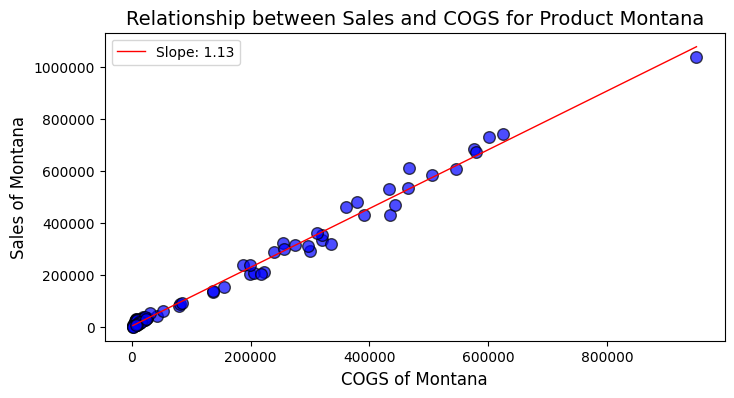

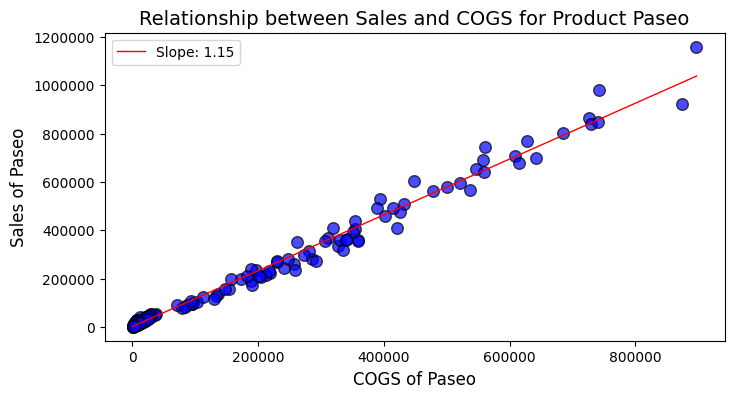

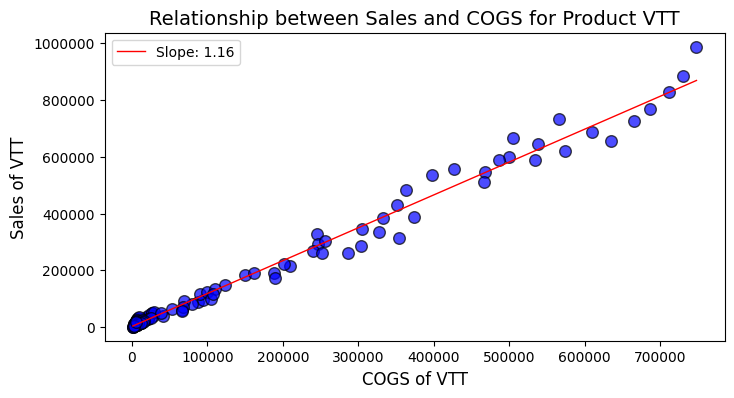

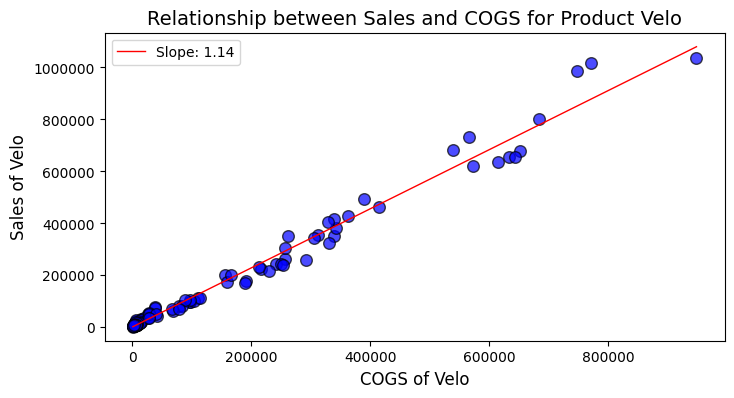

In [68]:
#Relationship between Sales and COGS by each product

grouped_data = df.groupby('product')
for product, group in grouped_data:
    slope, intercept = np.polyfit(group['cogs'], group['sales'], 1)
    x = np.array([group['cogs'].min(), group['cogs'].max()])
    y = slope * x + intercept
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(group['cogs'], group['sales'], alpha=0.7, s=70, c='blue', edgecolors='black')
    ax.plot(x, y, color='red', linewidth=1)
    ax.set_xlabel(f'COGS of {product}', fontsize=12)
    ax.set_ylabel(f'Sales of {product}', fontsize=12)
    ax.set_title(f"Relationship between Sales and COGS for Product {product}", fontsize=14)
    ax.ticklabel_format(style='plain', axis='y')  # Format y-axis as plain numbers
    slope_label = 'Slope: {:.2f}'.format(slope)
    plt.legend([slope_label])
    plt.show()

In [69]:
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618,3,20,32370,0,32370,16185,16185,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321,3,20,26420,0,26420,13210,13210,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178,3,15,32670,0,32670,21780,10890,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888,3,15,13320,0,13320,8880,4440,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470,3,15,37050,0,37050,24700,12350,2014-06-01,6,June,2014


### 5. HISTOGRAM

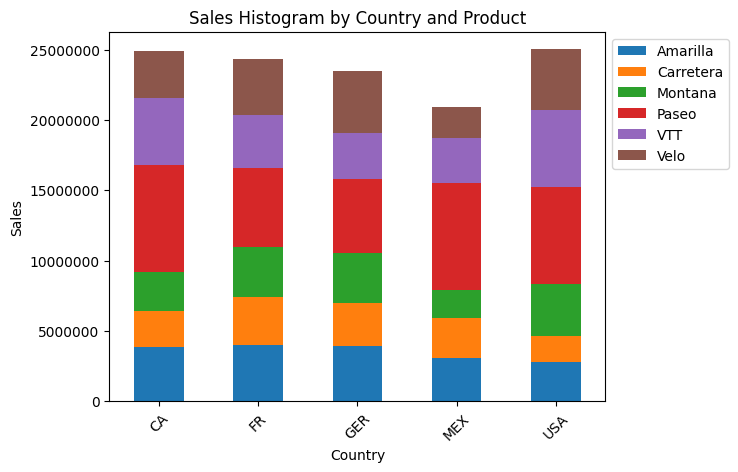

In [107]:
# Sales Histogram by Country and Product in stacked bars

grouped_data = df.groupby(['country', 'product']).sum().reset_index()

# Pivot the data to create a separate column for each product
pivoted_data = grouped_data.pivot(index='country', columns='product', values='sales')

# Abbreviate the labels
abbreviated_labels = ['CA', 'FR', 'GER', 'MEX', 'USA']  # Replace with your desired abbreviations

# Plotting the histogram
pivoted_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') 
plt.ylabel('Sales')
plt.title('Sales Histogram by Country and Product')

# Set the abbreviated labels
plt.xticks(range(len(abbreviated_labels)), abbreviated_labels)

plt.legend(bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

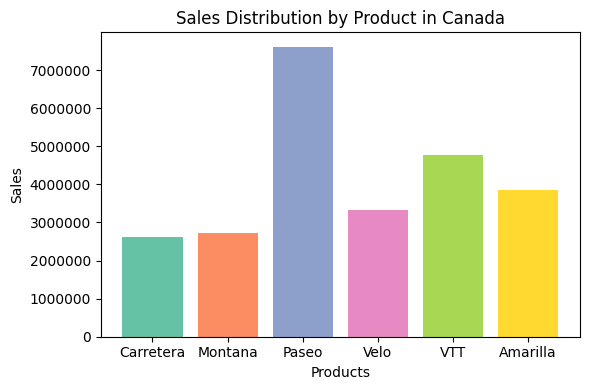

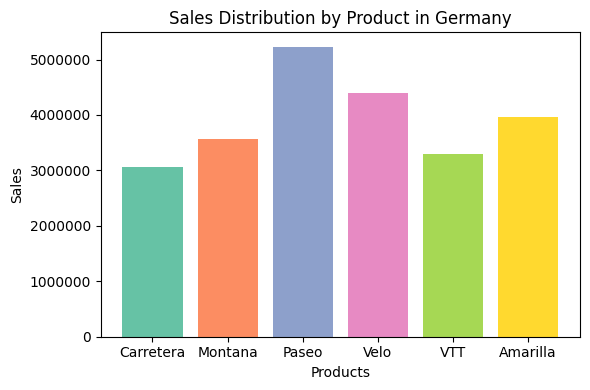

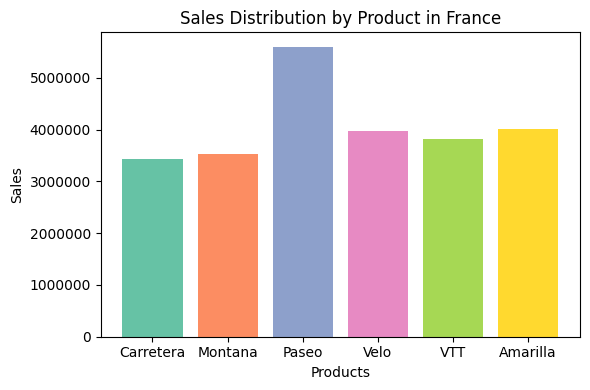

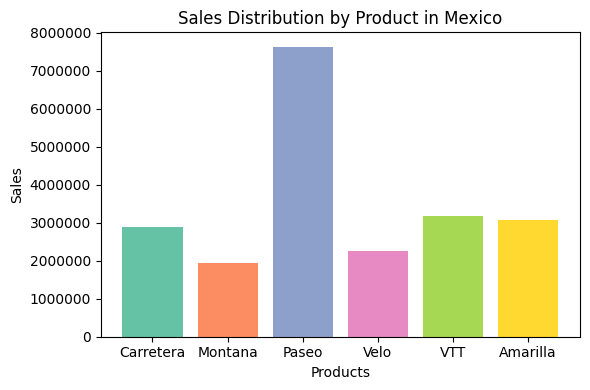

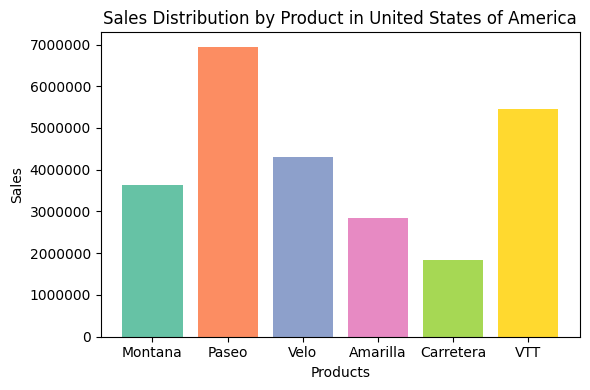

In [117]:
# Sales Histogram distribution by each Country and his respectives Products w/ the participation in his total sales
colors = sns.color_palette('Set2', len(products))
countries = df['country'].unique()
for country in countries:
    country_df = df[df['country'] == country]
    products = country_df['product'].unique()

    fig, ax = plt.subplots(figsize=(6, 4))
    for i, product in enumerate(products):
        product_sales = country_df[country_df['product'] == product]['sales']
        ax.bar(product, product_sales.sum(), color=colors[i])

    ax.set_xlabel('Products')
    ax.set_ylabel('Sales')
    ax.set_title(f'Sales Distribution by Product in {country}')
    ax.ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

In [8]:
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
202,Government,Canada,Velo,Low,2646,120,20,52920,2116,50803,26460,24343,2013-09-01,9,September,2013
626,Enterprise,France,Carretera,High,1023,3,125,127875,17902,109972,122760,-12787,2013-09-01,9,September,2013
336,Midmarket,United States of America,Paseo,Medium,2931,10,15,43965,3077,40887,29310,11577,2013-09-01,9,September,2013
179,Government,United States of America,Velo,Low,736,120,20,14720,588,14131,7360,6771,2013-09-01,9,September,2013
523,Midmarket,Mexico,Velo,High,655,120,15,9825,1080,8744,6550,2194,2013-09-01,9,September,2013


### 6. HEATMAP

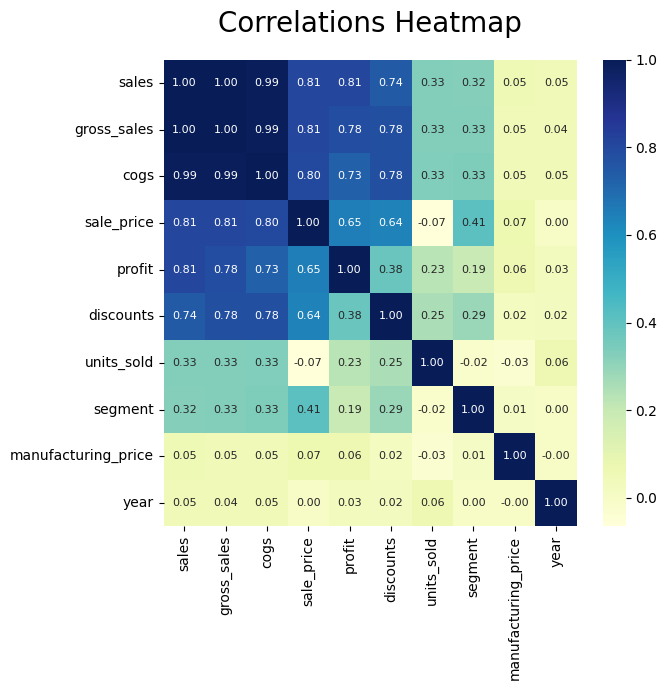

In [23]:
# Copy the original DataFrame
encoded_df = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of non-numerical features
non_numerical_features = ['country', 'segment', 'product', 'discount_band']

# Apply label encoding to the non-numerical features
for feature in non_numerical_features:
    encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])

# Create a correlation matrix focusing on the 'sales' feature
sales_corr = encoded_df.corr()['sales']

# Sort the correlations in descending order
sales_corr = sales_corr.sort_values(ascending=False)

# Select the top correlated features (e.g., top 10)
top_corr_features = sales_corr.head(10)

# Filter the encoded DataFrame to include only the top correlated features
filtered_df = encoded_df[top_corr_features.index]

# Set the figure size
plt.figure(figsize=(7, 7))

# Format the coefficients in the heatmap
fmt = '.2f'  # Format with 2 decimal places
sns.heatmap(filtered_df.corr(), annot=True, cmap="YlGnBu", annot_kws={"fontsize": 8}, fmt=fmt)
plt.title("Correlations Heatmap", pad=20, fontsize=20)

plt.tight_layout()

plt.show()

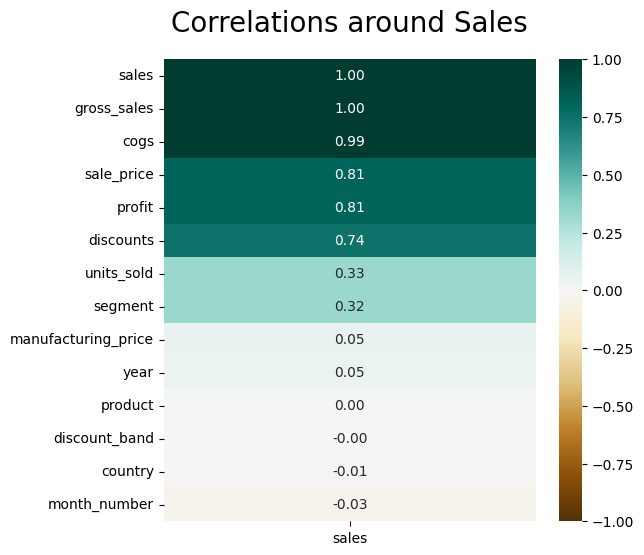

In [24]:
encoded_df = df.copy()
label_encoder = LabelEncoder()
non_numerical_features = 

for feature in non_numerical_features:
    encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(encoded_df.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, fmt=".2f" ,cmap='BrBG')
heatmap.set_title('Correlations around Sales', fontdict={'fontsize':20}, pad=20);

In [30]:
df.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
202,Government,Canada,Velo,Low,2646,120,20,52920,2116,50803,26460,24343,2013-09-01,9,September,2013
626,Enterprise,France,Carretera,High,1023,3,125,127875,17902,109972,122760,-12787,2013-09-01,9,September,2013
336,Midmarket,United States of America,Paseo,Medium,2931,10,15,43965,3077,40887,29310,11577,2013-09-01,9,September,2013
179,Government,United States of America,Velo,Low,736,120,20,14720,588,14131,7360,6771,2013-09-01,9,September,2013
523,Midmarket,Mexico,Velo,High,655,120,15,9825,1080,8744,6550,2194,2013-09-01,9,September,2013


### 7. BOXPLOTS

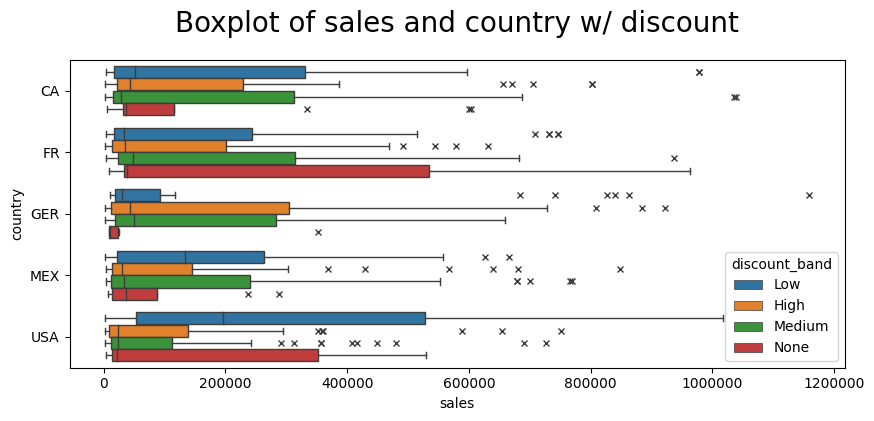

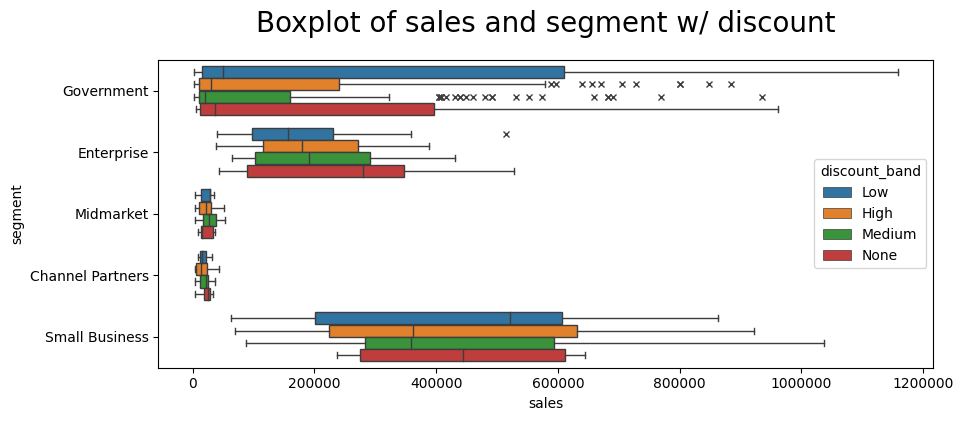

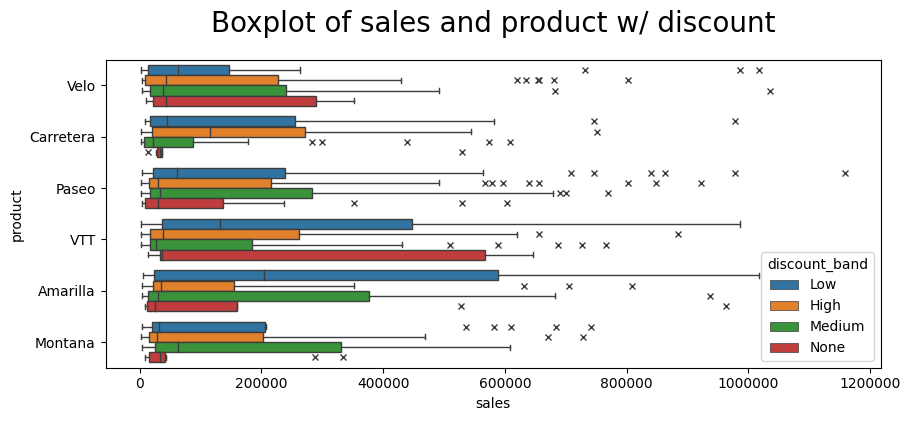

In [20]:
#Boxplot distribution of sales by each categorial feature in dataframe
categoricals = ['country', 'segment', 'product']
abbreviated_labels = ['CA', 'FR', 'GER', 'MEX', 'USA']

for i in categoricals:
    plt.figure(figsize=(10, 4))
    ax = sns.boxplot(data=df, x='sales', y=i, hue='discount_band', flierprops={"marker": "x", "markersize": 4}, linewidth=1)
    if i == 'country':
        ax.set_yticklabels(abbreviated_labels)
    ax.set_title(f"Boxplot of sales and {i} w/ discount", pad=20, fontsize=20)
    ax.ticklabel_format(style='plain', axis='x')
    plt.show()

### 8. AREA CHART

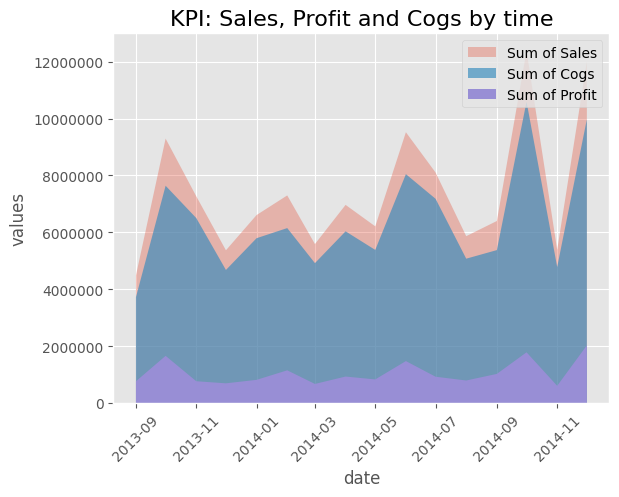

In [52]:
#Time series relation between sales, cogs and profit in area chart
#Observación datos a nivel mensual

sum_sales = df.groupby('date')['sales'].sum()
sum_profit = df.groupby('date')['profit'].sum()
sum_cogs = df.groupby('date')['cogs'].sum()

plt.fill_between(df['date'].unique(), sum_sales, alpha=0.33, label='Sum of Sales')
plt.fill_between(df['date'].unique(), sum_cogs, alpha=0.66, label= 'Sum of Cogs')
plt.fill_between(df['date'].unique(), sum_profit, alpha=1, label= 'Sum of Profit')

plt.style.use('ggplot')
plt.title('KPI: Sales, Profit and Cogs by time', fontsize=16)
plt.ylabel('values')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('date')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(0, None) 
plt.grid(True)
plt.show()